<a href="https://colab.research.google.com/github/subhendupaul79/AI_learning/blob/main/1_transformers_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nstalling Transformers
Transformers is available on PyPI and you can install it with pip. Open a terminal or command prompt, create a new virtual environment, and then run the following command:

In [ ]:
pip install transformers

In [ ]:
pip install torch

In [2]:
import transformers
import torch

**Running Pipelines**

Pipelines are the simplest way to use models out of the box in Transformers. In particular, the pipeline() function offers you a high-level abstraction over models in the Hugging Face Model Hub.

To see how this works, suppose you want to use a sentiment classification model. Sentiment classification models take in text as input and output a score that indicates the likelihood that the text has negative, neutral, or positive sentiment. One popular sentiment classification model available in the hub is the cardiffnlp/twitter-roberta-base-sentiment-latest model.

In [3]:
from transformers import pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_classifier = pipeline(model=model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
text_input = "I'm really excited about using Hugging Face to run AI models!"
sentiment_classifier(text_input)

[{'label': 'positive', 'score': 0.9863850474357605}]

In [5]:
text_input = "I have been grilled today!"
sentiment_classifier(text_input)

[{'label': 'neutral', 'score': 0.4520348608493805}]

In [6]:
text_input = "Its lot of fun today!"
sentiment_classifier(text_input)

[{'label': 'positive', 'score': 0.9875667095184326}]

The model scores range from 0 to 1. In the first example, sentiment_classifier predicts that the text has positive sentiment with high confidence. In the second and third examples, sentiment_classifier predicts the texts are negative and neutral, respectively.

If you want to classify multiple texts in one function call, you can pass a list into sentiment_classifier:



In [7]:
text_inputs = [
"What a great time to be alive!",
"How are you doing today?",
"I'm in a horrible mood.",
]

sentiment_classifier(text_inputs)

[{'label': 'positive', 'score': 0.9838392734527588},
 {'label': 'neutral', 'score': 0.7096881866455078},
 {'label': 'negative', 'score': 0.923816442489624}]

While every model in the hub has a slightly different interface, pipeline() is flexible enough to handle all of them. For example, a step up in complexity from sentiment classification is zero-shot text classification. Instead of classifying text as positive, neutral, or negative, zero-shot text classification models can classify text into arbitrary categories.

Here’s how you could instantiate a zero-shot text classifier with pipeline()

In [8]:
model_name = "MoritzLaurer/deberta-v3-large-zeroshot-v2.0"
zs_text_classifier = pipeline(model=model_name)

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/870M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/970 [00:00<?, ?B/s]

Device set to use cpu


In [10]:
candidate_labels = [
"Billing Issues",
"Technical Support",
"Account Information",
"General Inquiry",
]

hypothesis_template = "This text is about {}"

In [11]:
customer_text = "My account was charged twice for a single order."
zs_text_classifier( customer_text,
                    candidate_labels,
                    hypothesis_template = hypothesis_template,
                    multi_label=True
                  )

{'sequence': 'My account was charged twice for a single order.',
 'labels': ['Billing Issues',
  'General Inquiry',
  'Account Information',
  'Technical Support'],
 'scores': [0.9884458780288696,
  0.01255008764564991,
  0.008041918277740479,
  0.0002198851143475622]}

In [12]:
customer_text = "I dont know what is happening... the sound is very low in the phone"
zs_text_classifier( customer_text,
                    candidate_labels,
                    hypothesis_template = hypothesis_template,
                    multi_label=True
                  )

{'sequence': 'I dont know what is happening... the sound is very low in the phone',
 'labels': ['Technical Support',
  'General Inquiry',
  'Account Information',
  'Billing Issues'],
 'scores': [0.09799374639987946,
  0.024624081328511238,
  0.0001900850620586425,
  0.00011490406905068085]}

To further demonstrate the power of pipelines, you’ll use pipeline() to classify an image. Image classification is a sub-task of computer vision where a model predicts the likelihood that an image belongs to a specified class. Similar to NLP, image classifiers in the Model Hub can be pretrained on a specific set of labels or they can be trained for zero-shot classification.

In order to use image classifiers from Transformers, you must install Python’s image processing library, Pillow:

In [13]:
pip install Pillow

In [14]:
image_classifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


Notice here that you don’t pass the model argument into pipeline(). Instead, you specify the task as image-classification, and pipeline() returns the google/vit-base-patch16-224 model by default. This model is pretrained on a fixed set of labels, so you can specify the labels as you do with zero-shot classification.

In [15]:
predictions = image_classifier(["/content/aicheck1.jpg"])

In [16]:
len(predictions[0])

5

In [17]:
predictions[0][0]

{'label': 'golden retriever', 'score': 0.4045911729335785}

In [18]:
predictions[0][1]

{'label': 'bath towel', 'score': 0.1267627775669098}

In [19]:
predictions[0][2]

{'label': 'tabby, tabby cat', 'score': 0.09975767135620117}

In [20]:
predictions[0][3]

{'label': 'Egyptian cat', 'score': 0.044161804020404816}

**Looking Under the Hood With Auto Classes**

As you’ve seen so far, pipelines make it easy to use models out of the box. However, you may want to further customize models through techniques like fine-tuning. Fine-tuning is a technique that adapts a pretrained model to a specific task with potentially different but related data. For example, you could take an existing image classifier in the Model Hub and further train it to classify images that are proprietary to your company.

For customization tasks like fine-tuning, Transformers allows you to access the lower-level components that make up pipelines via auto classes. This section won’t go over fine-tuning or other customizations specifically, but you’ll get a deeper understanding of how pipelines work under the hood by looking at their auto classes.

Suppose you want more granular access and understanding of the cardiffnlp/twitter-roberta-base-sentiment-latest sentiment classifier pipeline you saw in the previous section. The first component of this pipeline, and almost every NLP pipeline, is the tokenizer.

Tokens can be words, subwords, or even characters, depending on the design of the tokenizer. A tokenizer is a component that processes input text and converts it into a format that the model can understand. It does this by breaking the text into tokens and associating those tokens with an ID.

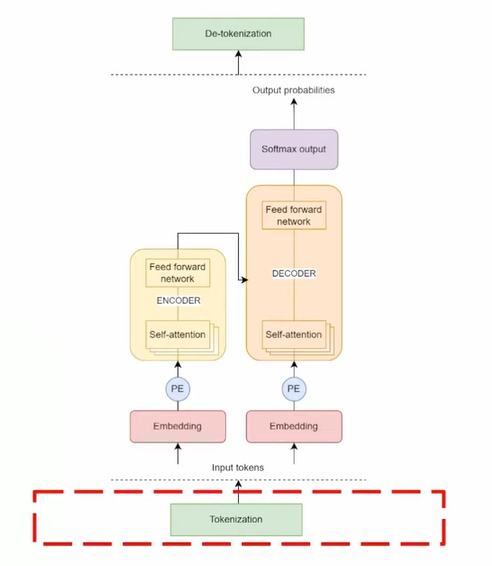

You can access tokenizers using the AutoTokenizer class. To see how this works, take a look at this example:

In [21]:
from transformers import AutoTokenizer

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)

input_text = "I really want to go to an island. Do you want to go?"
encoded_input = tokenizer(input_text)
encoded_input["input_ids"]

[0, 100, 269, 236, 7, 213, 7, 41, 2946, 4, 1832, 47, 236, 7, 213, 116, 2]

In [22]:
tokenizer.convert_ids_to_tokens(7)

'Ġto'

In [23]:
tokenizer.convert_ids_to_tokens(encoded_input["input_ids"])

['<s>',
 'I',
 'Ġreally',
 'Ġwant',
 'Ġto',
 'Ġgo',
 'Ġto',
 'Ġan',
 'Ġisland',
 '.',
 'ĠDo',
 'Ġyou',
 'Ġwant',
 'Ġto',
 'Ġgo',
 '?',
 '</s>']

You can see how many tokens are in the tokenizer’s vocabulary by looking at the vocab_size attribute:

In [25]:
tokenizer.vocab_size

50265

In [31]:
new_tokens = [
    "whaleshark",
    "unicorn",
]



In [32]:
tokenizer.convert_tokens_to_ids(new_tokens)

[50265, 50266]

In [29]:
tokenizer.add_tokens(new_tokens)

0

In [33]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification
)

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [34]:
model.roberta.embeddings

RobertaEmbeddings(
  (word_embeddings): Embedding(50265, 768, padding_idx=1)
  (position_embeddings): Embedding(514, 768, padding_idx=1)
  (token_type_embeddings): Embedding(1, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

It’s out of the scope of this tutorial to look at all of the intricacies of the Roberta model, but pay close attention to the word_embeddings layer here. You may have noticed that the first input to Embedding() in the word_embeddings layer is 50265—the exact size of the tokenizer’s vocabulary.

This is because the first embedding layer maps each token in the vocabulary to a PyTorch tensor of size 768. In other words, Embedding(50265, 768) maps all 50,265 tokens in the vocabulary to a PyTorch tensor with 768 elements. To get a better understanding of how this works, you can convert input text to embeddings directly using the embeddings layer:

In [35]:
text = "I love using the Transformers library!"
encoded_input = tokenizer(text, return_tensors="pt")

embedding_tensor = model.roberta.embeddings(encoded_input["input_ids"])
embedding_tensor.shape

torch.Size([1, 9, 768])

In [36]:
embedding_tensor

tensor([[[ 0.0633, -0.0212,  0.0193,  ..., -0.0826, -0.0200, -0.0056],
         [ 0.1453,  0.3706, -0.0322,  ...,  0.0359, -0.0750,  0.0376],
         [ 0.2900, -0.0814,  0.0955,  ...,  0.3262, -0.0559,  0.0819],
         ...,
         [ 0.1059, -0.5638, -0.2397,  ..., -0.2077, -0.0784, -0.0951],
         [ 0.1675, -0.3334,  0.0130,  ..., -0.4127,  0.0121,  0.0215],
         [ 0.1316, -0.0281, -0.0168,  ...,  0.1175,  0.0908, -0.0614]]],
       grad_fn=<NativeLayerNormBackward0>)

Use image.png

n this block, you define text and convert each token to its corresponding ID using tokenizer(). You then pass the token IDs into Roberta’s embeddings layer and store the results as embedding_tensor. Notice how the size of embedding_tensor is [1, 9, 768]. This is because you passed one text input into the embedding layer that had nine tokens in it, and each token was converted to a tensor with 768 elements.

When you look at the embedding_tensor string representation, the first row is the embedding for the <s> token, the second row is for the I token, the third for the love token, and so on. If you wanted to fine-tune the Roberta model with new tokens, you’d first add the new tokens to the tokenizer as you did previously, and then you’d have to update and train the embeddings layer with a 768-element tensor for each new token.

In the full model, the embedding tensor is passed through multiple layers where it’s reshaped, manipulated, and eventually converted to a predicted score for each sentiment class.

You can piece together these auto classes to create the entire pipeline:

In [37]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    AutoConfig
)

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

text = "I love using the Transformers library!"
encoded_input = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    output = model(**encoded_input)

scores = output.logits[0]
probabilities = torch.softmax(scores, dim=0)

for i, probability in enumerate(probabilities):
    label = config.id2label[i]
    print(f"{i+1}) {label}: {probability}")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1) negative: 0.0026470276061445475
2) neutral: 0.010737841948866844
3) positive: 0.9866151213645935


Here, you first import torch along with the auto classes you saw previously. Additionally, you import AutoConfig, which has configuration and metadata for the model. You then store the pipeline name in model_name and instantiate the configuration object, tokenizer, and model object.

Next, you define text and tokenize it with tokenizer(). You then pass the tokenized input, encoded_input, to the model object and store the results as output. You use the torch.no_grad() context manager to speed up model inference by disabling gradient calculations.

After that, you convert the raw model output to scores and then transform the scores to sum to 1 using torch.softmax(). Lastly, you loop through each element in probabilities and output the value along with the associated label, which comes from config.id2label. The results tell you that the model assigns a predicted probability of about 0.9866 to the positive class for the input text.

You can verify that this code gives the same results as the cardiffnlp/twitter-roberta-base-sentiment-latest pipeline you used in the earlier example:

In [38]:
from transformers import pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
text = "I love using the Transformers library!"

full_pipeline = pipeline(model=model_name)
full_pipeline(text)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'label': 'positive', 'score': 0.9866151213645935}]